In [1]:
## Sholl plots
# Fits sholl analysis data generated by SNT (https://imagej.net/plugins/sholl-analysis) with a 5th degree polynomial and plots the profile. Profiles are colored by the septum of exit. 
# Cassady S. Olson 

import os
import sys
import numpy as np
import csv 

import matplotlib.pyplot as plt
from nerveAnalysisFunctions import getFiles
plt.ion
import numpy.polynomial.polynomial as poly



print("loaded")



loaded


In [2]:
# Load in Sholl plots generated by SNT Sholl plot: https://imagej.net/plugins/sholl-analysis 

mainPath = r"/Users/ragsdalelab/Documents/Segmentation_NerveAnalysis/data/TipAlphaTub/ShollAnalysis/"
subFolder = r'Aboral/'
files = getFiles(mainPath + subFolder)
# sort files proximal-distal
files.sort()

In [3]:
# Fit Raw Sholl plot with a polynomial 

newFit = []
xVals = []
# set number of degrees to test 
numDegrees = 7
resid = np.zeros([len(files), numDegrees])

for file in range(len(files)):
    # Load data
    data = np.genfromtxt(mainPath + subFolder + files[file], delimiter=',')

    # Fit polynomial to section of sholl plot where it's changing (derivative > 0)
    z = np.diff(data[:,1])
    idx = np.nonzero(z)[0][0]
    endIdx = np.max(np.nonzero(z))

    # Cycle through 6 degrees of polynomials to check fits 
    for deg in range(numDegrees):
        if idx <= 1:
            # select territory where derivative > 0 
            endIdx = endIdx + 1
            x = data[0:endIdx,0]
            y = data[0:endIdx,1]
            x_new = data[0:endIdx,2]

            # Fit the polynomial
            coefs, stats = poly.polyfit(x, y, deg, full = True)
            resid[file, deg] = stats[0]
            ffit = poly.polyval(x_new, coefs)

            # Save out fit 
            new = data[0,1]* np.ones([len(data)])
            new[0:endIdx] = ffit
            new[new <= 1.65] = 1
        
        else:
            # select territory where derivative > 0 
            idx = idx - 1
            endIdx = endIdx + 1
            x = data[idx:endIdx,0]
            y = data[idx:endIdx,1]
            x_new = data[idx:endIdx,2]

            # Fit the polynomial
            coefs, stats = poly.polyfit(x, y, deg, full = True)
            resid[file, deg] = stats[0]
            ffit = poly.polyval(x_new, coefs)

            # Save out fit 
            new = data[0,1] * np.ones([len(data)])
            new[idx:endIdx] = ffit
            new[new <= 1.65] = 1
        
    
        if deg == 5:
            # Fifth degree polynomial is selected 
            newFit.append(new)
            xVals.append(data[:,2])

            # Uncomment to Visually inspect goodness of fit 
            # fig, ax = plt.subplots() 
            # ax.plot(data[:,2], new, 'k')           
            # ax.scatter(data[:,0], data[:,1])
            # ax.set_title(files[file])
            # plt.legend(['Fit', 'Raw'], loc="upper left") 
# Uncomment to inpsect residuals for each degree polynomial
#fig, ax = plt.subplots()
#ax.plot(np.transpose(resid))
#ax.set_xlabel('Degree of Polynomial')
#ax.set_ylabel('Residuals')

In [4]:
# MIN MAX NORMALIZATION
maxRad = [max(a) for a in xVals]
minRad = [min(a) for a in xVals]
maxNorm = max((maxRad))
minNorm = min((minRad))

normXVals = [(a - minNorm)/(maxNorm - minNorm) for a in xVals]

In [5]:
# Septa colors: manually selected 
cmap = ['palevioletred','crimson', 'tab:orange', 'gold', 'limegreen', 'dodgerblue', 'mediumorchid']#get_cmap(35, 'jet')
aboralColorIdx =np.array([0, 1, 2, 2, 4, 6, 6])


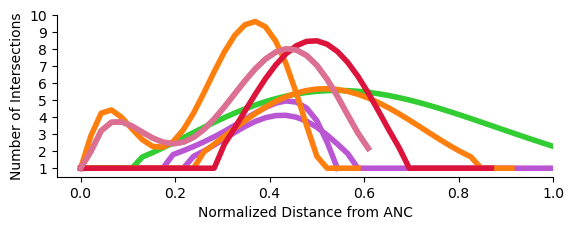

In [6]:
# ABORAL NERVE PLOT
fig, ax = plt.subplots()
for file in range(len(files)):
    # Select data to plot 
    fitData = newFit[-file]
    x = normXVals[-file]

    # Select color index
    thisIdx = aboralColorIdx[-file]

    # Plot 
    ax.plot(x, fitData, linewidth=4.0, c = cmap[thisIdx])

# Ensure index 0 is plotted on top    
ax.plot(normXVals[0], newFit[0], linewidth=4.0, c = cmap[aboralColorIdx[0]])

# Set Plot Parameters 
ax.set_aspect(0.036)
ax.set_ylim(0.5,10)
ax.set_xlim(-0.05,1)
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xlabel('Normalized Distance from ANC')
ax.set_ylabel('Number of Intersections')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)  
